In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
y1 = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y2 = np.array([1.2, 1.6, 3.1, 4.2, 4.8])
y3 = np.array([3.2, 1.1, 2.0, 4.9, 2.5])

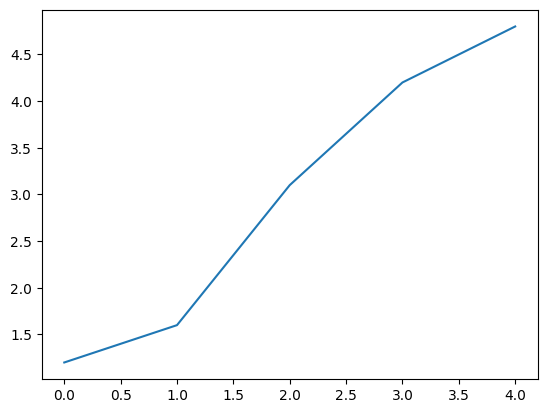

In [3]:
fig, ax = plt.subplots()
lines = ax.plot(y2)
assert len(lines) == 1
xdata, ydata = lines[0].get_data()
assert np.array_equal(xdata, [0., 1., 2., 3., 4.])
assert np.array_equal(ydata, [1.2, 1.6, 3.1, 4.2, 4.8])

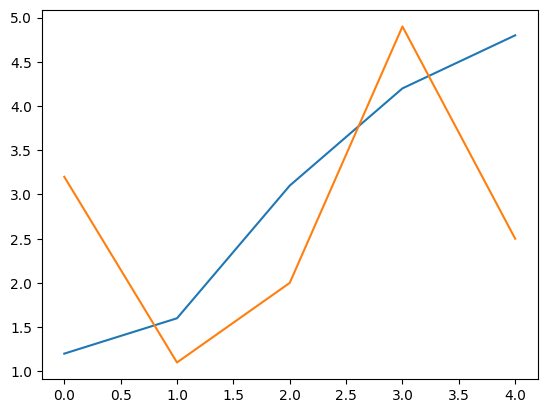

In [4]:
fig, ax = plt.subplots()
lines = ax.plot(y2)
assert len(lines) == 1
xdata, ydata = lines[0].get_data()
assert np.array_equal(xdata, [0., 1., 2., 3., 4.])
assert np.array_equal(ydata, [1.2, 1.6, 3.1, 4.2, 4.8])
lines = ax.plot(y3)
assert len(lines) == 1
xdata, ydata = lines[0].get_data()
assert np.array_equal(xdata, [0., 1., 2., 3., 4.])
assert np.array_equal(ydata, [3.2, 1.1, 2.0, 4.9, 2.5])

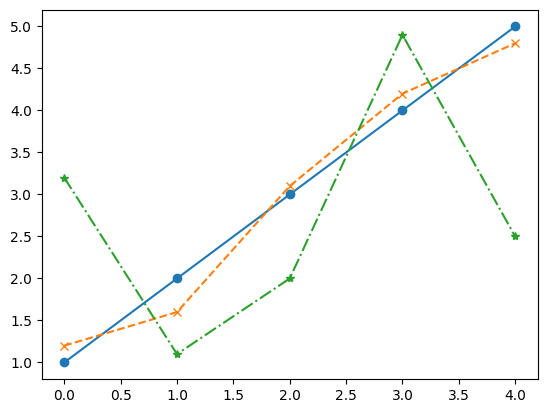

In [5]:
fig, ax = plt.subplots()
line1, = ax.plot(y1, "o-")   # expecting a single-element list
xdata1, ydata1 = line1.get_data()
assert np.array_equal(xdata1, [0., 1., 2., 3., 4.])
assert np.array_equal(ydata1, [1.0, 2.0, 3.0, 4.0, 5.0])
lines = ax.plot(y2, "x--", y3, "*-.")
assert len(lines) == 2
xdata2, ydata2 = lines[0].get_data()
assert np.array_equal(xdata2, [0., 1., 2., 3., 4.])
assert np.array_equal(ydata2, [1.2, 1.6, 3.1, 4.2, 4.8])
xdata3, ydata3 = lines[1].get_data()
assert np.array_equal(xdata3, [0., 1., 2., 3., 4.])
assert np.array_equal(ydata3, [3.2, 1.1, 2.0, 4.9, 2.5])

We want t plot the $f(x,y) = x^2 y^3$ function on the $-2 \leq x \leq 2$ and $-1 \leq y \leq 1$ range.

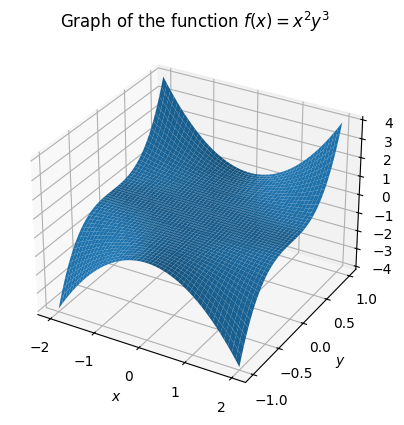

In [6]:
X = np.linspace(-2, 2)
Y = np.linspace(-1, 1)
x, y = np.meshgrid(X, Y)
z = x**2 * y**3

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, z)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")
ax.set_title(r"Graph of the function $f(x) = x^2 y^3$");

We can customize the appearance of a three-dimensional plot (or contour plot) to enhance the plot and make sure the detail that we wish to highlight is clear. The easiest way to do this is by changing the color map of the plot.

We will generate plots for the following function:

$$
f(x, y) = \cos(2 \pi (x^2 + y^2)) \: \mathrm{e}^{-(x^2 + y^2)}
$$

In [7]:
X = np.linspace(-2, 2)
Y = np.linspace(-2, 2)
x, y = np.meshgrid(X, Y)
t = x**2 + y**2
z = np.cos(2*np.pi*t)*np.exp(-t)

With the `cmap` keyword attribute of the `plot_surface` call, the surface is colored according to its $z$ value; the larger the $z$ value, the lighter the shade of gray.

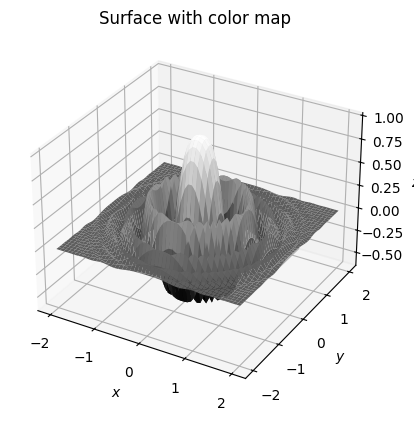

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(x, y, z, cmap="binary_r")
ax.set_title(r"Surface with color map")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$");

Color maps also applied to contour plots. The darker shades of gray in the diagram correspond to the lower values of $z$.

Text(0, 0.5, '$y$')

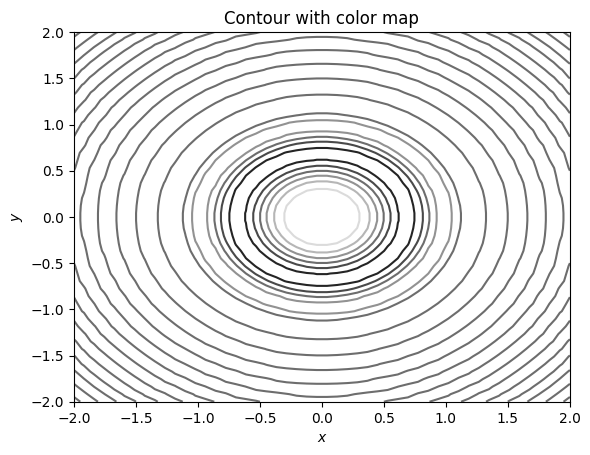

In [11]:
fig = plt.figure()
plt.contour(x, y, z, cmap="binary_r")
plt.title("Contour with color map")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

For more advanced uses, Matplotlib provides an interface for creating custom shading using *light sources*. This is done by importing the `LightSource` class from the `matplotlib.colors` package, and then using an instance of this class to shade the surface elements according to the $z$ value. This is done using the `shade` method on the `LightSource` object:

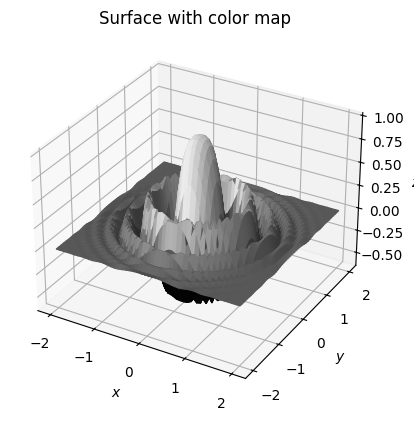

In [16]:
from matplotlib.colors import LightSource
light_source = LightSource(0, 45)
vals = light_source.shade(z, plt.get_cmap("binary_r"))

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(x, y, z, cmap="binary_r")
ax.set_title(r"Surface with color map")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$");
ax.plot_surface(x, y, z, facecolors=vals);